## Weight  of evidence

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

Weight of Evidence (WoE) was developed primarily for the credit and financial industries to help build more predictive models to evaluate the risk of loan default. That is, to predict how likely the money lent to a person or institution is to be lost. Thus, Weight of Evidence is a measure of the "strength” of a grouping technique to separate good and bad risk (default). 

- WoE will be 0 if the P(Goods) / P(Bads) = 1, that is, if the outcome is random for that group.
- If P(Bads) > P(Goods) the odds ratio will be < 1 and,
- WoE will be < 0 if,  P(Goods) > P(Bads).

WoE is well suited for Logistic Regression, because the Logit transformation is simply the log of the odds, i.e., ln(P(Goods)/P(Bads)). Therefore, by using WoE-coded predictors in logistic regression, the predictors are all prepared and coded to the same scale, and the parameters in the linear logistic regression equation can be directly compared.

The WoE transformation has three advantages:

- It creates a monotonic relationship between the target and the independent variables.
- It orders the categories on a "logistic" scale which is natural for logistic regression
- The transformed variables can then be compared because they are on the same scale. Therefore, it is possible to determine which one is more predictive.

The WoE also has a limitation:

- Prone to cause over-fitting


For more details follow this [article](https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html#Steps-of-Calculating-WOE).


## In this demo:

We will see how to perform one hot encoding with pandas using the Titanic dataset.

For guidelines to obtain the dataset, visit **section 2** of the course.

In [61]:
# omd
import numpy as np

p_good = 0.2
p_bad = 0.8
odds_ratio = p_good / p_bad
print(f"odds_ratio = p_good / p_bad = {p_good / p_bad}")
woe = np.log(odds_ratio)
print(f"woe = np.log(odds_ratio) = {woe:.2f}")

odds_ratio = p_good / p_bad = 0.25
woe = np.log(odds_ratio) = -1.39


In [62]:
# omd
import numpy as np

p_good = 0.8
p_bad = 0.2
odds_ratio = p_good / p_bad
print(f"odds_ratio = p_good / p_bad = {p_good / p_bad}")
woe = np.log(odds_ratio)
print(f"woe = np.log(odds_ratio) = {woe:.2f}")

odds_ratio = p_good / p_bad = 4.0
woe = np.log(odds_ratio) = 1.39


<font color="green"># omd</font>   

In a binary classification scorecard, the probability of the event (positive class) is denoted as `P(Event)`, and the probability of a non-event (negative class) is denoted as `P(Non-event)`. The odds ratio is the ratio of the probability of the event to the probability of a non-event, expressed as:

$$
\text{Odds Ratio} = \frac{P(Event)}{P(Non-event)}
$$

The weight of evidence (WoE) is a transformation of the odds ratio and is calculated as the natural logarithm of the odds ratio, multiplied by a scaling factor. Mathematically, the WoE is expressed as:

$$
\text{WoE} = \ln\left(\frac{P(Event)}{P(Non-event)}\right) \times \text{scaling factor}
$$

The scaling factor is typically chosen such that when the probability of the event is equal to the probability of a non-event, the WoE value is zero. Commonly, this scaling factor is chosen to be the natural logarithm of 2 (i.e., \( \ln(2) \)).

The WoE is used in credit scoring and other applications to transform continuous variables into a linear scale, making it easier to interpret and incorporate into models such as logistic regression. It is used to quantify the relationship between the predictor variables and the target variable in a way that is consistent across different variables and can handle missing values and outliers effectively. A higher WoE value indicates a stronger relationship between the predictor variable and the target variable, with positive WoE values indicating a positive relationship (higher odds of the event) and negative WoE values indicating a negative relationship (lower odds of the event).

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# to split the datasets
from sklearn.model_selection import train_test_split

In [64]:
# load dataset

data = pd.read_csv(
    "../../Datasets/titanic.csv", usecols=["cabin", "sex", "embarked", "survived"]
)

data.head()

,survived,sex,cabin,embarked
0,1,female,B5,S
1,1,male,C22,S
2,0,female,C22,S
3,0,male,C22,S
4,0,female,C22,S


In [65]:
# let's remove observations with na in embarked

data.dropna(subset=["embarked"], inplace=True)
data.shape

(1307, 4)

In [66]:
# Now we extract the first letter of the cabin
# to create a simpler variable for the demo

data["cabin"] = data["cabin"].astype(str).str[0]

In [67]:
# and we remove the observations where cabin = T
# because only few observations show T in the dataset

data = data[data["cabin"] != "T"]
data.shape

(1306, 4)

In [68]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ": ", len(data[col].unique()), " labels")

survived :  2  labels
sex :  2  labels
cabin :  8  labels
embarked :  3  labels


In [69]:
# let's explore the unique categories
data["cabin"].unique()

array(['B', 'C', 'E', 'D', 'A', 'n', 'F', 'G'], dtype=object)

In [70]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [71]:
data["embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

### Encoding important

We select calculate the woe using the train set, and then use those mappings in the test set.

Note that in the pandas implementation, we need to keep the target in the training set

In [72]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[["cabin", "sex", "embarked", "survived"]],  # this time we keep the target!!
    data["survived"],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0,
)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((914, 4), (392, 4))

### Explore original relationship between categorical variables and target

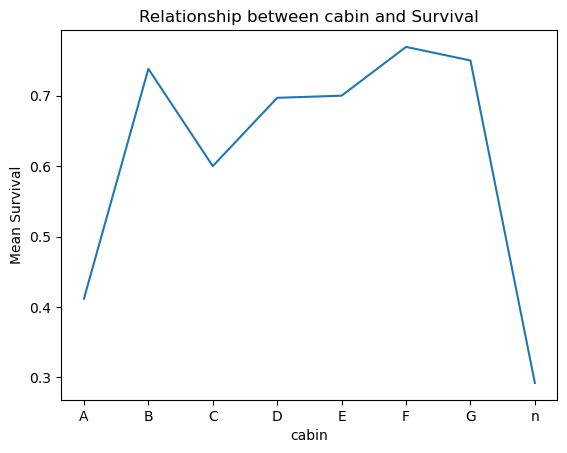

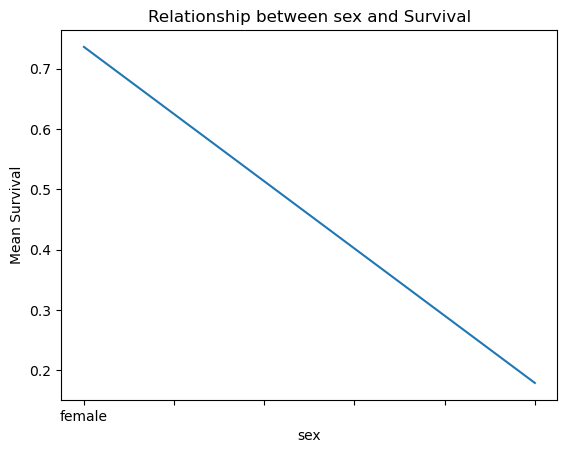

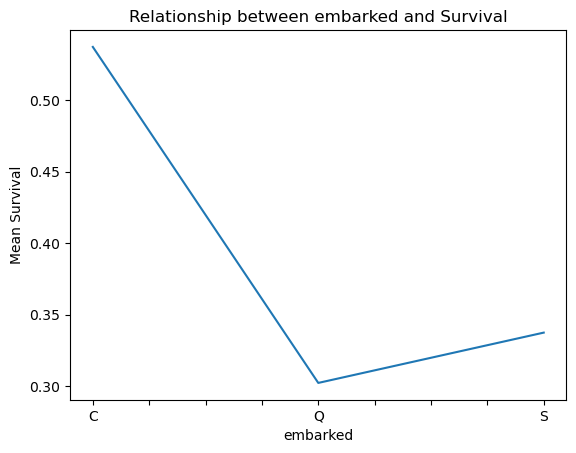

In [73]:
# let's explore the relationship of the categories with the target

for var in ["cabin", "sex", "embarked"]:

    fig = plt.figure()
    fig = y_train.groupby(X_train[var]).mean().plot()
    fig.set_title("Relationship between {} and Survival".format(var))
    fig.set_ylabel("Mean Survival")
    plt.show()

You can see that the relationship between the target and cabin and embarked goes up and down, depending on the category.


## Weight of Evidence with pandas


### Advantages

- quick
- returns pandas dataframe

### Limitations of pandas:

- it does not preserve information from train data to propagate to test data

We need to store the mappings separately if planning to use the model in production.

In [74]:
# let's calculate the proportion of passengers who survived
# over the total survivors, per category of cabin

# total survivors
total_survived = X_train["survived"].sum()

# percentage of passenges who survived, from total survivors
# per category of cabin
survived = X_train.groupby(["cabin"])["survived"].sum() / total_survived

survived

cabin
A    0.020408
B    0.090379
C    0.122449
D    0.067055
E    0.061224
F    0.029155
G    0.008746
n    0.600583
Name: survived, dtype: float64

In [75]:
# let's calculate the proportion of passengers who did not survive
# over the total passengers who didn't, per category of cabin

# total passengers who did not survive
total_non_survived = len(X_train) - X_train["survived"].sum()

# let's create a flag for passenges who did not survive
X_train["non_survived"] = np.where(X_train["survived"] == 1, 0, 1)

# now let's calculate the % of passengers who did not survive
# per category of cabin
non_survived = X_train.groupby(["cabin"])["non_survived"].sum() / total_non_survived

non_survived

cabin
A    0.017513
B    0.019264
C    0.049037
D    0.017513
E    0.015762
F    0.005254
G    0.001751
n    0.873905
Name: non_survived, dtype: float64

In [76]:
#  now let's combine those 2 series in a dataframe and calculate the
# WoE

# let's concatenate the series in a dataframe
prob_df = pd.concat([survived, non_survived], axis=1)

# let's calculate the Weight of Evidence
prob_df["woe"] = np.log(prob_df["survived"] / prob_df["non_survived"])

prob_df

,survived,non_survived,woe
cabin,,,
A,0.020408,0.017513,0.152984
B,0.090379,0.019264,1.545751
C,0.122449,0.049037,0.915124
D,0.067055,0.017513,1.342568
E,0.061224,0.015762,1.356957
F,0.029155,0.005254,1.713632
G,0.008746,0.001751,1.608271
n,0.600583,0.873905,-0.375071


In [77]:
# and now let's capture the woe in a dictionary

ordered_labels = prob_df["woe"].to_dict()

ordered_labels

{'A': 0.1529838185513379,
 'B': 1.545750694176846,
 'C': 0.9151238705982346,
 'D': 1.3425678854251744,
 'E': 1.356956622877274,
 'F': 1.7136315668160063,
 'G': 1.60827105115818,
 'n': -0.37507116447186734}

In [78]:
# now, we replace the labels with the woe

X_train["cabin"] = X_train["cabin"].map(ordered_labels)
X_test["cabin"] = X_test["cabin"].map(ordered_labels)

In [79]:
# let's explore the result

X_train["cabin"].head(10)

843    -0.375071
869    -0.375071
430    -0.375071
481    -0.375071
1308   -0.375071
456    -0.375071
118     1.342568
485     1.342568
297    -0.375071
263     1.356957
Name: cabin, dtype: float64

In [80]:
# we can turn the previous commands into 2 functions


def find_category_mappings(df, variable, target):

    # copy of the original dataframe, so we do not accidentally
    # modify it
    tmp = df.copy()

    # total positive class
    total_pos = df[target].sum()

    # total negative class
    total_neg = len(df) - df[target].sum()

    # non target
    tmp["non-target"] = 1 - tmp[target]

    # % of positive class per category, respect to total positive class
    pos_perc = tmp.groupby([variable])[target].sum() / total_pos

    # % of negative class per category, respect to total negative class
    neg_perc = tmp.groupby([variable])["non-target"].sum() / total_neg

    # let's concatenate
    prob_tmp = pd.concat([pos_perc, neg_perc], axis=1)

    # let's calculate the Weight of Evidence
    prob_tmp["woe"] = np.log(prob_tmp[target] / prob_tmp["non-target"])

    return prob_tmp["woe"].to_dict()


def integer_encode(train, test, variable, ordinal_mapping):

    train[variable] = train[variable].map(ordinal_mapping)

    test[variable] = test[variable].map(ordinal_mapping)

In [81]:
# and now we run a loop over the remaining categorical variables

for variable in ["sex", "embarked"]:

    mappings = find_category_mappings(X_train, variable, "survived")

    integer_encode(X_train, X_test, variable, mappings)

In [82]:
# let's see the result

X_train.head()

,cabin,sex,embarked,survived,non_survived
843,-0.375071,-1.013111,-0.164796,0,1
869,-0.375071,-1.013111,-0.164796,0,1
430,-0.375071,1.535068,-0.164796,1,0
481,-0.375071,1.535068,0.658871,1,0
1308,-0.375071,-1.013111,-0.164796,0,1


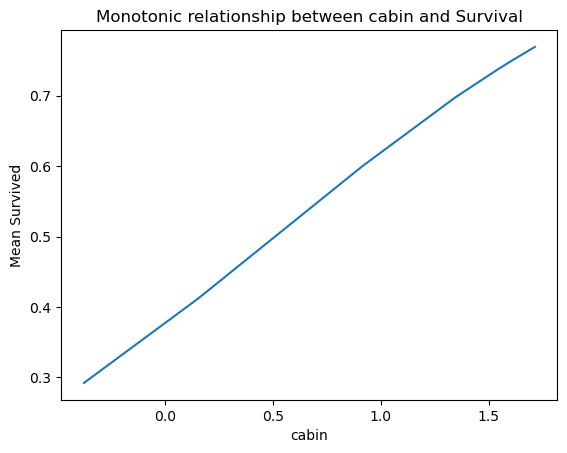

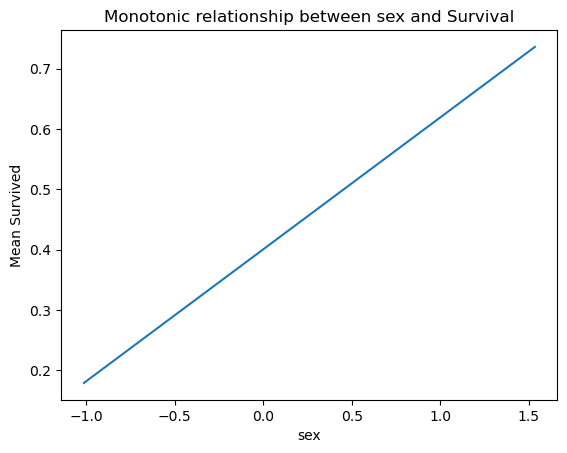

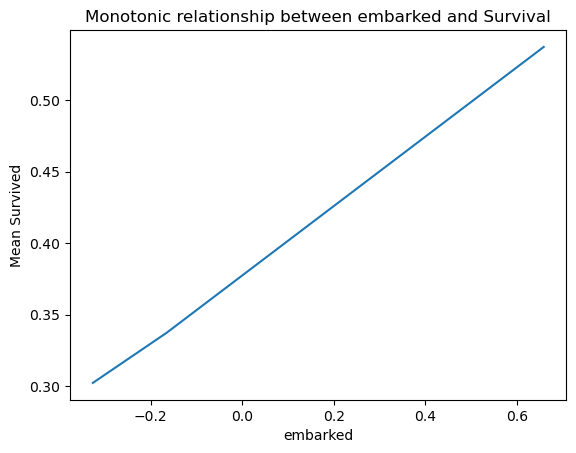

In [83]:
# let's inspect the newly created monotonic relationship
# between the categorical variables and the target

# first in the train set
for var in ["cabin", "sex", "embarked"]:

    fig = plt.figure()
    fig = X_train.groupby([var])["survived"].mean().plot()
    fig.set_title("Monotonic relationship between {} and Survival".format(var))
    fig.set_ylabel("Mean Survived")
    plt.show()

Note the monotonic relationships between the mean target and the categories. In the train set.

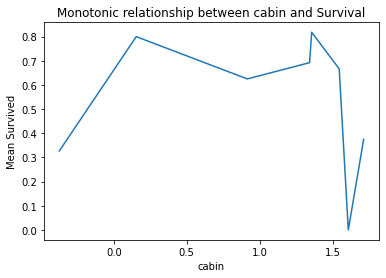

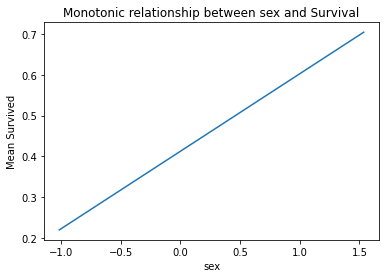

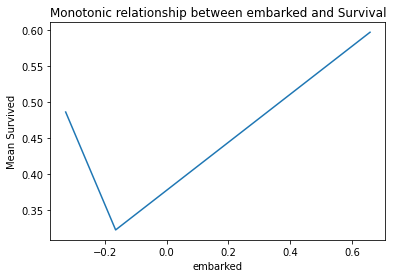

In [22]:
# now in the test set
for var in ["cabin", "sex", "embarked"]:

    fig = plt.figure()
    fig = X_test.groupby([var])["survived"].mean().plot()
    fig.set_title("Monotonic relationship between {} and Survival".format(var))
    fig.set_ylabel("Mean Survived")
    plt.show()

The monotonic relationship does not hold when encoding the categorical variables in the test set. This could mean that the categories are not informative of the target or the proportion of survivors is not homogeneous between in the categories in the train and test sets. 

In situations like this, we could try grouping rare labels into a joint category as we will cover later in this section, before applying the Weight of evidence transformation.

### Note

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand. I will explain how to do this, in a later notebook.

**In addition, it will create NA or Inf if any of the 2 terms in the ratio of the WoE formula are 0**